1.1 SGD 梯度下降法

In [17]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads): #params grads字典型变量
        for key in params.keys():
            params[key] -= self.lr * grads[key]
        return params,grads

In [31]:
import numpy as np

# 初始参数
params = {
    'W': np.array([[1.0, 2.0, 3.0],
                   [4.0, 5.0, 6.0]]),
    'b': np.array([0.1, 0.2])
}

# 对应梯度
grads = {
    'W': np.array([[0.1, 0.2, 0.3],
                   [0.4, 0.5, 0.6]]),
    'b': np.array([0.01, 0.02])
}

# 创建优化器（学习率设为0.1）
optimizer = SGD(lr=0.1)

# 查看初始参数
print("初始参数值:")
for key, value in params.items(): #.items()获取字典中所有的键值对，返回一个包含(键, 值)元组的列表
    print(f"{key}:")
    print(value)

# 执行参数更新
optimizer.update(params, grads)

# 查看最终参数
print("\n最终参数值:")
for key, value in params.items():
    print(f"{key}:")
    print(value)

初始参数值:
W:
[[1. 2. 3.]
 [4. 5. 6.]]
b:
[0.1 0.2]

最终参数值:
W:
[[0.99 1.98 2.97]
 [3.96 4.95 5.94]]
b:
[0.099 0.198]


In [34]:
import numpy as np

# 目标函数
def f(x, y):
    return (1/20) * x**2 + y**2

# 计算梯度函数
def compute_gradients(x, y):
    """返回梯度字典"""
    return {
        'x': (1/10) * x,  # ∂f/∂x = x/10
        'y': 2 * y         # ∂f/∂y = 2y
    }

# 初始化参数
params = {'x': 10.0, 'y': 10.0}  # 初始参数值
optimizer = SGD(lr=0.1)           # 创建 SGD 优化器实例
num_iterations = 500              # 迭代次数

# 执行随机梯度下降
for i in range(num_iterations):
    # 计算当前梯度
    grads = compute_gradients(params['x'], params['y'])
    
    # 使用优化器更新参数
    params, _ = optimizer.update(params, grads)
    
    # 每10次迭代打印进度
    if (i+1) % 50 == 0:
        current_value = f(params['x'], params['y'])
        print(f"Iteration {i+1}: x = {params['x']:.6f}, y = {params['y']:.6f}, f(x,y) = {current_value:.6f}")

# 打印最终结果
print("\n优化结果:")
print(f"最终参数: x = {params['x']:.6f}, y = {params['y']:.6f}")
print(f"函数最小值: f(x,y) = {f(params['x'], params['y']):.6f}")

Iteration 50: x = 6.050061, y = 0.000143, f(x,y) = 1.830162
Iteration 100: x = 3.660323, y = 0.000000, f(x,y) = 0.669898
Iteration 150: x = 2.214518, y = 0.000000, f(x,y) = 0.245204
Iteration 200: x = 1.339797, y = 0.000000, f(x,y) = 0.089753
Iteration 250: x = 0.810585, y = 0.000000, f(x,y) = 0.032852
Iteration 300: x = 0.490409, y = 0.000000, f(x,y) = 0.012025
Iteration 350: x = 0.296700, y = 0.000000, f(x,y) = 0.004402
Iteration 400: x = 0.179506, y = 0.000000, f(x,y) = 0.001611
Iteration 450: x = 0.108602, y = 0.000000, f(x,y) = 0.000590
Iteration 500: x = 0.065705, y = 0.000000, f(x,y) = 0.000216

优化结果:
最终参数: x = 0.065705, y = 0.000000
函数最小值: f(x,y) = 0.000216


1.2 SGD 的缺点与其他方法:如果函数的形状非均向（anisotropic），比如呈延伸状，搜索的路径就会非常低效
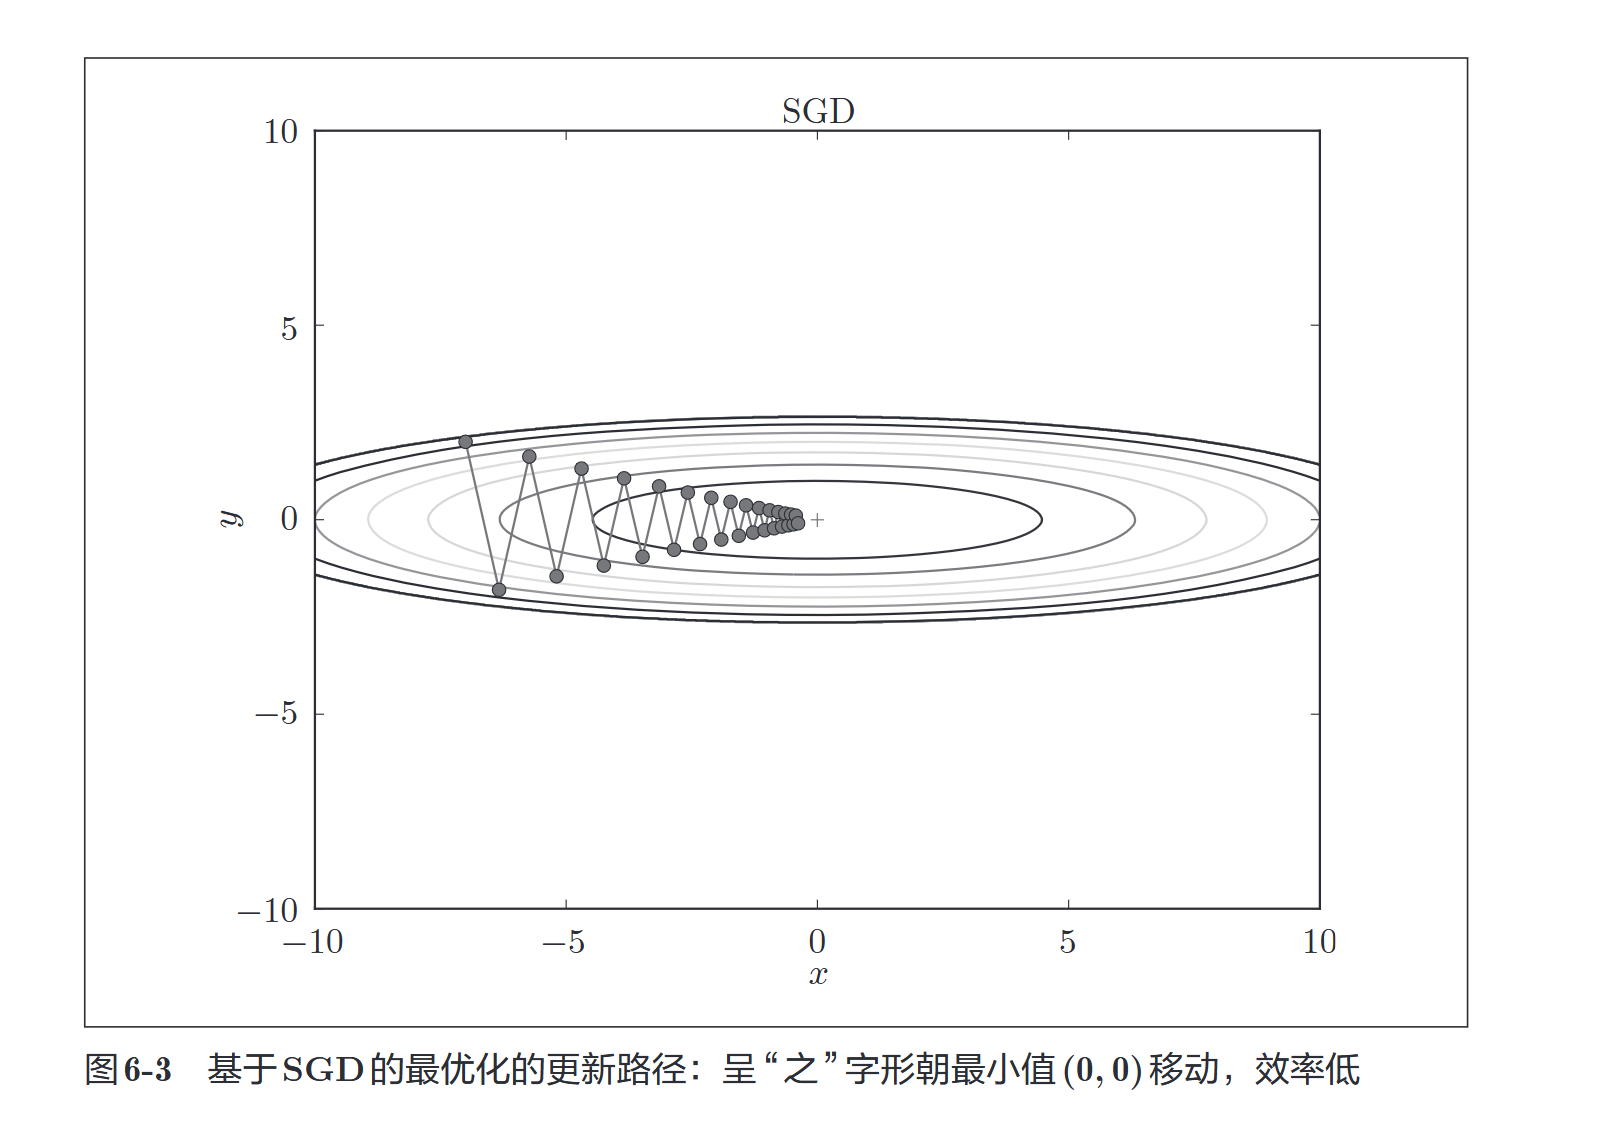

#Momentum 动量
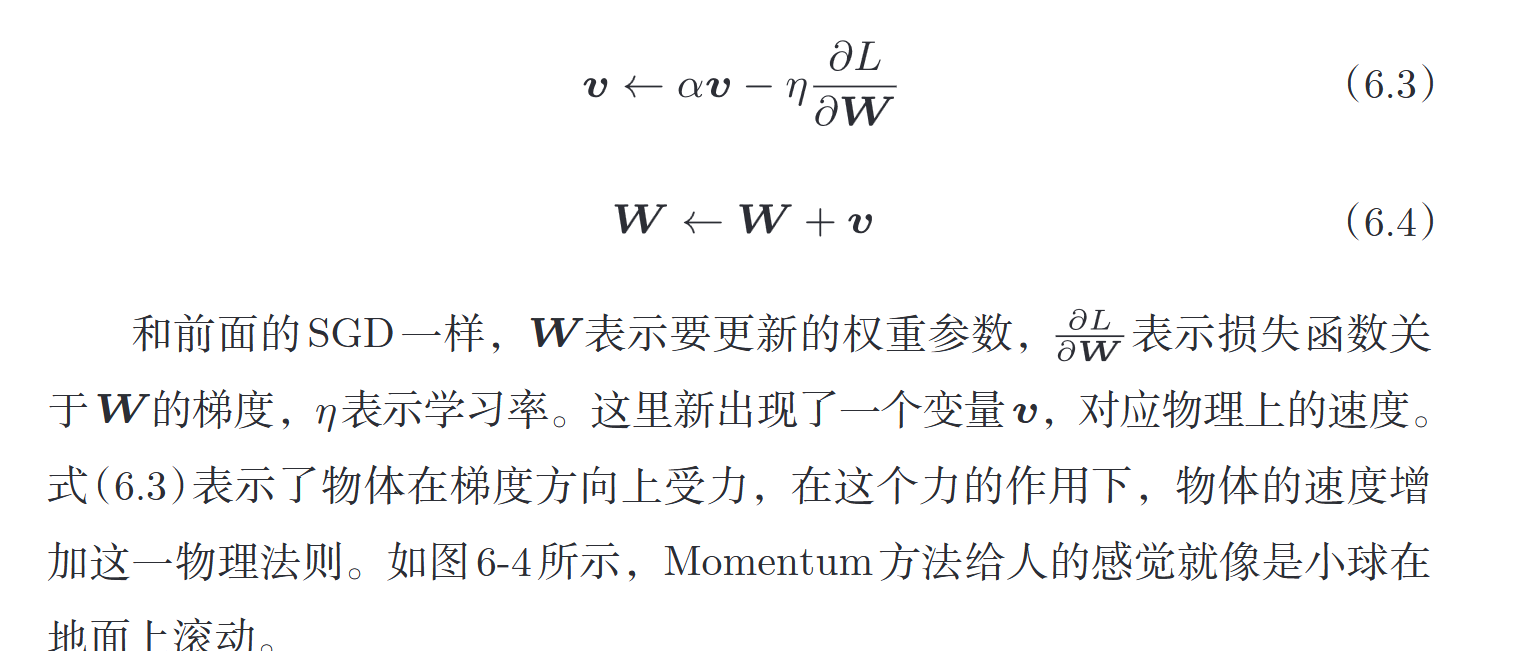

In [45]:
#Momentum 动量
class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):  
        self.lr = lr # 学习率（默认 0.01）
        self.momentum = momentum # 动量系数（默认 0.9）
        self.v = None # 存储速度向量的字典（初始为空）
        
    def update(self, params, grads): # 为每个参数初始化一个全零的速度向量（与参数维度相同）
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                 
                self.v[key] = np.zeros_like(val) # 创建与参数同形状的零数组
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]
        return params, grads

In [48]:
import numpy as np

# 目标函数
def f(x, y):
    return (1/20) * x**2 + y**2

# 计算梯度函数
def compute_gradients(x, y):
    """返回梯度字典"""
    return {
        'x': (1/10) * x,  # ∂f/∂x = x/10
        'y': 2 * y         # ∂f/∂y = 2y
    }

# 初始化参数
params = {'x': 10.0, 'y': 10.0}  # 初始参数值
optimizer = Momentum(lr=0.01)           # 创建 SGD 优化器实例
num_iterations = 400              # 迭代次数

# 执行随机梯度下降
for i in range(num_iterations):
    # 计算当前梯度
    grads = compute_gradients(params['x'], params['y'])
    
    # 使用优化器更新参数
    params, _ = optimizer.update(params, grads)
    
    # 每10次迭代打印进度
    if (i+1) % 50 == 0:
        current_value = f(params['x'], params['y'])
        print(f"Iteration {i+1}: x = {params['x']:.6f}, y = {params['y']:.6f}, f(x,y) = {current_value:.6f}")

# 打印最终结果
print("\n优化结果:")
print(f"最终参数: x = {params['x']:.6f}, y = {params['y']:.6f}")
print(f"函数最小值: f(x,y) = {f(params['x'], params['y']):.6f}")

Iteration 50: x = 6.438566, y = 0.739376, f(x,y) = 2.619434
Iteration 100: x = 3.686286, y = 0.042281, f(x,y) = 0.681223
Iteration 150: x = 2.106841, y = 0.001554, f(x,y) = 0.221941
Iteration 200: x = 1.204100, y = -0.000021, f(x,y) = 0.072493
Iteration 250: x = 0.688166, y = -0.000011, f(x,y) = 0.023679
Iteration 300: x = 0.393300, y = -0.000001, f(x,y) = 0.007734
Iteration 350: x = 0.224778, y = -0.000000, f(x,y) = 0.002526
Iteration 400: x = 0.128465, y = -0.000000, f(x,y) = 0.000825

优化结果:
最终参数: x = 0.128465, y = -0.000000
函数最小值: f(x,y) = 0.000825


AdaGrad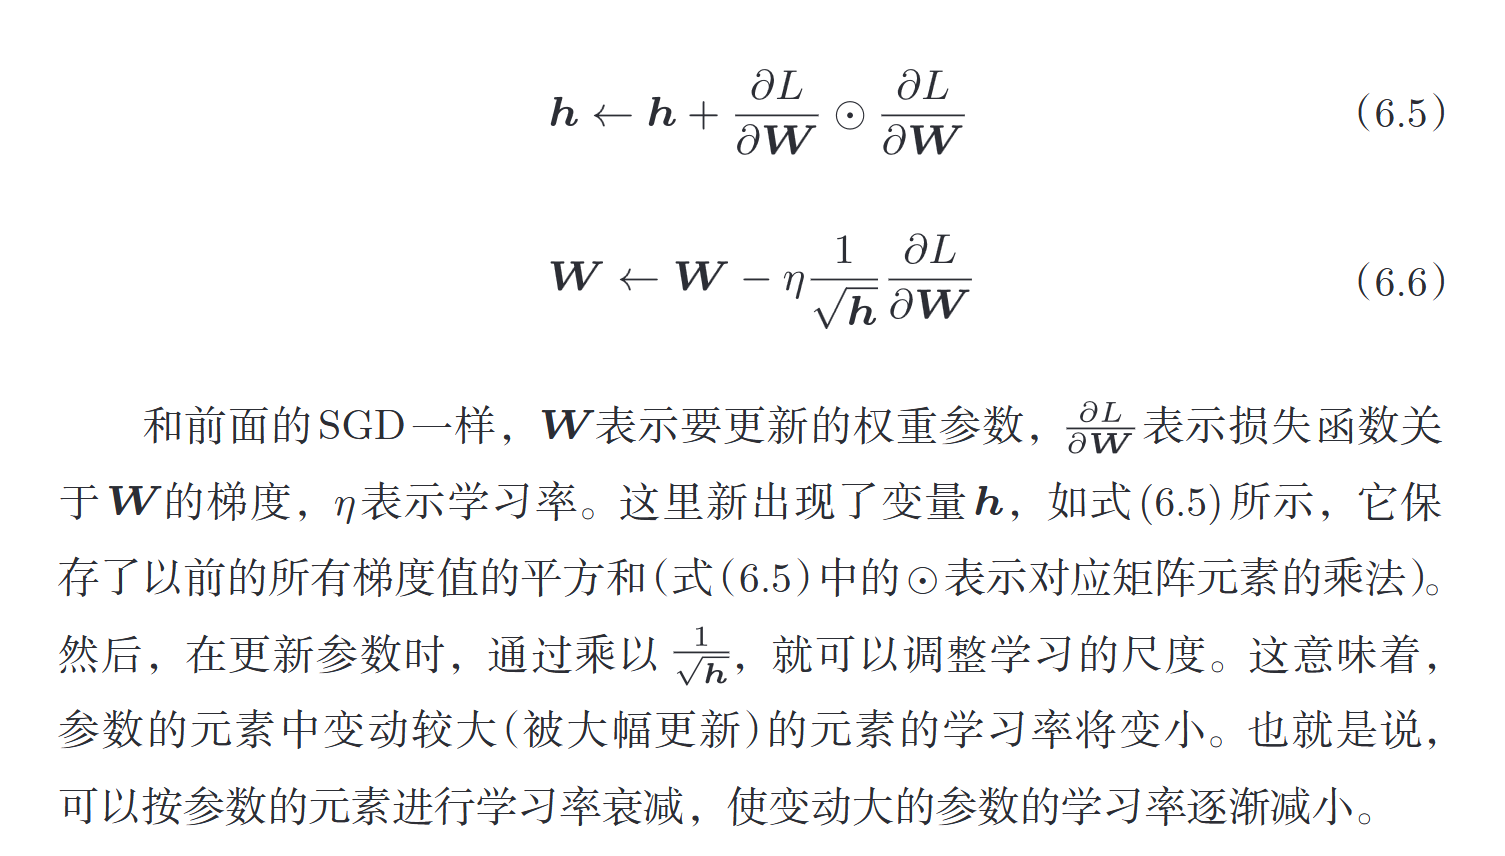

In [39]:
# 定义 AdaGrad 优化器类
class AdaGrad:
    """AdaGrad 优化器（自适应学习率）"""
    
    def __init__(self, lr=0.01):
        self.lr = lr       # 基础学习率
        self.h = None      # 历史梯度平方和（字典）
        
    def update(self, params, grads):
        """更新参数
        params: 参数字典 {'x': x_value, 'y': y_value}
        grads: 梯度字典 {'x': x_grad, 'y': y_grad}
        """
        # 初始化历史梯度记录
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)  # 初始化为0
        
        # 更新每个参数
        for key in params.keys():
            # 累积历史梯度平方和
            self.h[key] += grads[key] * grads[key]
            
            # 计算自适应学习率
            adaptive_lr = self.lr / (np.sqrt(self.h[key]) + 1e-7)
            
            # 使用自适应学习率更新参数
            params[key] -= adaptive_lr * grads[key]
            
        return params, grads

In [49]:
import numpy as np

# 目标函数
def f(x, y):
    return (1/20) * x**2 + y**2

# 计算梯度函数
def compute_gradients(x, y):
    """返回梯度字典"""
    return {
        'x': (1/10) * x,  # ∂f/∂x = x/10
        'y': 2 * y         # ∂f/∂y = 2y
    }

# 初始化参数
params = {'x': 10.0, 'y': 10.0}  # 初始参数值
optimizer = AdaGrad(lr=1)           # 创建 SGD 优化器实例
num_iterations = 200              # 迭代次数

# 执行随机梯度下降
for i in range(num_iterations):
    # 计算当前梯度
    grads = compute_gradients(params['x'], params['y'])
    
    # 使用优化器更新参数
    params, _ = optimizer.update(params, grads)
    
    # 每10次迭代打印进度
    if (i+1) % 20 == 0:
        current_value = f(params['x'], params['y'])
        print(f"Iteration {i+1}: x = {params['x']:.6f}, y = {params['y']:.6f}, f(x,y) = {current_value:.6f}")

# 打印最终结果
print("\n优化结果:")
print(f"最终参数: x = {params['x']:.6f}, y = {params['y']:.6f}")
print(f"函数最小值: f(x,y) = {f(params['x'], params['y']):.6f}")

Iteration 20: x = 3.765760, y = 3.765760, f(x,y) = 14.889997
Iteration 40: x = 1.902093, y = 1.902093, f(x,y) = 3.798856
Iteration 60: x = 0.991238, y = 0.991238, f(x,y) = 1.031681
Iteration 80: x = 0.520498, y = 0.520498, f(x,y) = 0.284464
Iteration 100: x = 0.273869, y = 0.273869, f(x,y) = 0.078754
Iteration 120: x = 0.144181, y = 0.144181, f(x,y) = 0.021828
Iteration 140: x = 0.075918, y = 0.075918, f(x,y) = 0.006052
Iteration 160: x = 0.039976, y = 0.039976, f(x,y) = 0.001678
Iteration 180: x = 0.021050, y = 0.021050, f(x,y) = 0.000465
Iteration 200: x = 0.011084, y = 0.011084, f(x,y) = 0.000129

优化结果:
最终参数: x = 0.011084, y = 0.011084
函数最小值: f(x,y) = 0.000129


Adam = Momentum + AdaGrad
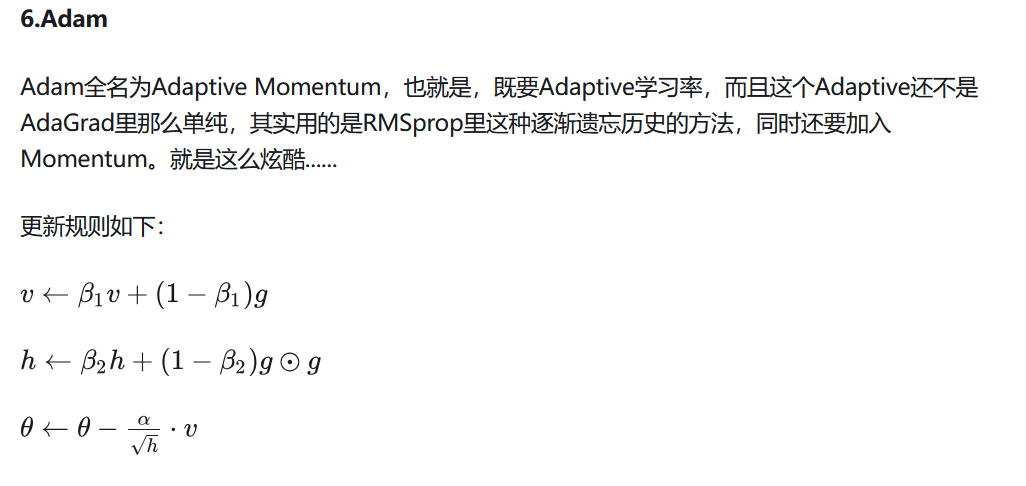

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr          # 基础学习率
        self.beta1 = beta1    # 一阶矩估计的指数衰减率（动量相关）
        self.beta2 = beta2    # 二阶矩估计的指数衰减率（自适应学习率相关）
        self.iter = 0         # 迭代计数器
        self.m = None         # 一阶矩估计（梯度的指数加权平均）
        self.v = None         # 二阶矩估计（梯度平方的指数加权平均）
            
    def update(self, params, grads):
        # 第一次迭代时初始化m和v字典
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)  # 初始化为零向量
                self.v[key] = np.zeros_like(val)  # 初始化为零向量
        
        self.iter += 1  # 增加迭代计数器
        
        # 计算偏差修正后的学习率
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)     
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


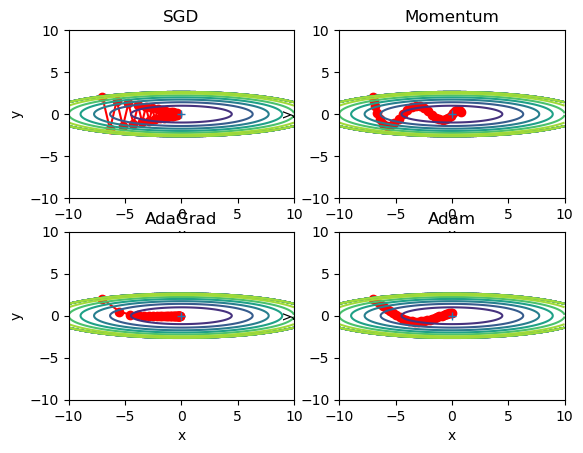

In [50]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.266917888213362
Momentum:2.4211942190683384
AdaGrad:2.1399144048877767
Adam:2.18687783063804
===========iteration:100===========
SGD:1.5441625766329823
Momentum:0.45873771798192053
AdaGrad:0.1636510535179308
Adam:0.2830140853744356
===========iteration:200===========
SGD:0.8191192403207694
Momentum:0.32473165287893946
AdaGrad:0.14052881400671713
Adam:0.2239266943783164
===========iteration:300===========
SGD:0.5795431790746762
Momentum:0.23368217176208875
AdaGrad:0.09208471348720187
Adam:0.11675794130976863
===========iteration:400===========
SGD:0.5157574951677544
Momentum:0.2724056124954256
AdaGrad:0.09927628694084698
Adam:0.18728208106199196
===========iteration:500===========
SGD:0.2984098405387505
Momentum:0.18791873065362893
AdaGrad:0.08600427794882798
Adam:0.151704832002039
===========iteration:600===========
SGD:0.3245168582728343
Momentum:0.0850018070061982
AdaGrad:0.04325873452147992
Adam:0.04718040525561371
===========iteration:700====

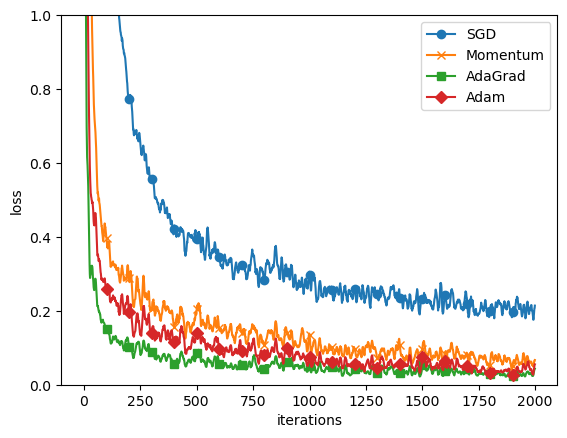

In [51]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:读入MNIST数据==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
